# Loading data

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL
from PIL.ImageOps import grayscale
from tensorflow.keras import utils

In [2]:
data = []
label = []
for folder in os.listdir('Cyrillic'):
    for image in os.listdir('Cyrillic/' + str (folder)):
        temp = PIL.Image.open('Cyrillic/' + str(folder) + '/' + str(image)).resize((32,32))
        temp.load()
        background = PIL.Image.new("RGB", temp.size, (255, 255, 255))
        background.paste(temp, mask = temp.split()[3])
        #data.append(np.array(grayscale (background.resize((32,32)))))
        data.append(np.array(background.resize((32,32))))
        label.append(folder)
data = np.array(data)

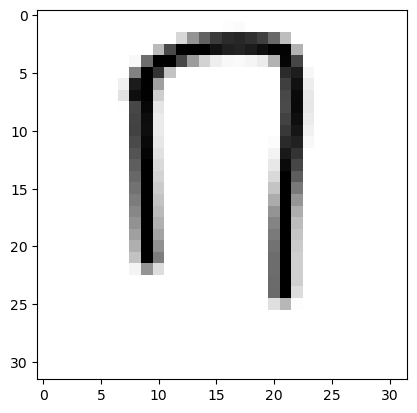

In [3]:
plt.imshow(data[8000])

In [4]:
data.shape

(15480, 32, 32, 3)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size= 0.33, random_state= 14)

In [6]:
X_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [7]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
X_train = X_train / 255.0
# Все преобразования с тренировочным наборам повторяем и для тестового
X_test = X_test / 255.0

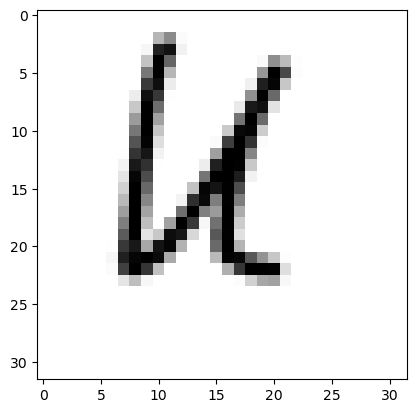

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train[0].shape

(32, 32, 3)

In [18]:
def label_encoder(data):
    output = []
    cat_codes = np.unique(data)
    num_codes = []
    num_codes.extend(range(0,len(cat_codes)))
    dict_codes = {}
    res = {cat_codes[i]: num_codes[i] for i in range(len(cat_codes))}
    print (res)
    
    for i in data:
        output.append(res[i])
    return (output)

In [19]:
label_encoder(y_train)

{'I': 0, 'Ё': 1, 'А': 2, 'Б': 3, 'В': 4, 'Г': 5, 'Д': 6, 'Е': 7, 'Ж': 8, 'З': 9, 'И': 10, 'Й': 11, 'К': 12, 'Л': 13, 'М': 14, 'Н': 15, 'О': 16, 'П': 17, 'Р': 18, 'С': 19, 'Т': 20, 'У': 21, 'Ф': 22, 'Х': 23, 'Ц': 24, 'Ч': 25, 'Ш': 26, 'Щ': 27, 'Ъ': 28, 'Ы': 29, 'Ь': 30, 'Э': 31, 'Ю': 32, 'Я': 33}


In [33]:
y_train = label_encoder (y_train)
y_test = label_encoder (y_test)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33}


In [12]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
#y_train = utils.to_categorical(y_train)
#y_test = utils.to_categorical(y_test)

In [14]:
X_train.shape

(10371, 32, 32, 3)

In [15]:
len(X_train)

10371

In [16]:
len(y_train)

10371

# Building Model

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline 

In [18]:
X_train.shape

(10371, 32, 32, 3)

In [19]:
#X_train = X_train.reshape(10371,32,32,1)

In [20]:
#X_train.shape

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu' ,input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(34))

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(34, activation='softmax'))

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss='categorical_crossentropy',
              metrics=['accuracy'],)

history = model.fit(X_train, y_train,
              #batch_size=128,
              epochs=4,
              validation_split=0.2,
              verbose=2)

Epoch 1/4


C:\Users\vnvof\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


260/260 - 10s - loss: 1.7305 - accuracy: 0.5102 - val_loss: 0.7505 - val_accuracy: 0.7759 - 10s/epoch - 38ms/step
Epoch 2/4
260/260 - 9s - loss: 0.6039 - accuracy: 0.8135 - val_loss: 0.4262 - val_accuracy: 0.8680 - 9s/epoch - 35ms/step
Epoch 3/4
260/260 - 9s - loss: 0.3520 - accuracy: 0.8874 - val_loss: 0.3445 - val_accuracy: 0.8993 - 9s/epoch - 36ms/step
Epoch 4/4
260/260 - 9s - loss: 0.2267 - accuracy: 0.9295 - val_loss: 0.3273 - val_accuracy: 0.9089 - 9s/epoch - 36ms/step


In [27]:
predictions = model.predict(X_train)
predictions = np.argmax(predictions, axis=1)
predictions

325/325 [==============================] - 2s 7ms/step


array([10, 22, 12, ..., 20, 29,  6], dtype=int64)

In [28]:
model.save('model_1')

INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


In [29]:
from tensorflow.keras.models import load_model
model2 = load_model('model_1')
predictions = model2.predict(X_train)
predictions = np.argmax(predictions, axis=1)
predictions

325/325 [==============================] - 2s 7ms/step


array([10, 22, 12, ..., 20, 29,  6], dtype=int64)